# DSMC - Dongkuk Steel Mill Co Ltd

In [1]:
from data_functions import *

I will be giving investment recommendations for the company DSMC in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [2]:
DSMC = pd.read_csv('./Data/South Korea - Dongkuk Steel Mill Co Ltd (001230).csv')
DSMC

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021","13,650","13,700","13,750","13,450",0.19K,0.00%
1,"Mar 30, 2021","13,650","13,850","14,200","13,050",3.17M,0.74%
2,"Mar 29, 2021","13,550","12,500","13,800","12,500",0.20K,11.07%
3,"Mar 28, 2021","12,200","12,200","12,200","12,200",-,0.00%
4,"Mar 26, 2021","12,200","11,500","12,300","11,350",2.34M,7.96%
...,...,...,...,...,...,...,...
337,"Jan 07, 2020","5,690","5,740","5,770","5,650",303.89K,-0.70%
338,"Jan 06, 2020","5,730","5,890","5,890","5,680",319.88K,-2.88%
339,"Jan 03, 2020","5,900","5,870","5,920","5,830",230.40K,0.85%
340,"Jan 02, 2020","5,850","5,930","5,980","5,820",239.90K,-1.68%


In [3]:
DSMC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      342 non-null    object
 1   Price     342 non-null    object
 2   Open      342 non-null    object
 3   High      342 non-null    object
 4   Low       342 non-null    object
 5   Vol.      341 non-null    object
 6   Change %  341 non-null    object
dtypes: object(7)
memory usage: 18.8+ KB


In [4]:
## drop last row because it doesn't contain relevant information

DSMC.drop(341, inplace=True)

In [5]:
## change date column to datetime

DSMC['Date'] = pd.to_datetime(DSMC['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

DSMC['Price'] = DSMC['Price'].str.replace(',', '').astype(float)
DSMC['Open'] = DSMC['Open'].str.replace(',', '').astype(float)
DSMC['High'] = DSMC['High'].str.replace(',', '').astype(float)
DSMC['Low'] = DSMC['Low'].str.replace(',', '').astype(float)

In [7]:
DSMC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      341 non-null    datetime64[ns]
 1   Price     341 non-null    float64       
 2   Open      341 non-null    float64       
 3   High      341 non-null    float64       
 4   Low       341 non-null    float64       
 5   Vol.      341 non-null    object        
 6   Change %  341 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 21.3+ KB


In [8]:
DSMC.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
DSMC

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,5850.0,5930.0,5980.0,5820.0,239.90K,-1.68%
1,2020-01-03,5900.0,5870.0,5920.0,5830.0,230.40K,0.85%
2,2020-01-06,5730.0,5890.0,5890.0,5680.0,319.88K,-2.88%
3,2020-01-07,5690.0,5740.0,5770.0,5650.0,303.89K,-0.70%
4,2020-01-08,5430.0,5640.0,5640.0,5390.0,524.10K,-4.57%
...,...,...,...,...,...,...,...
336,2021-03-26,12200.0,11500.0,12300.0,11350.0,2.34M,7.96%
337,2021-03-28,12200.0,12200.0,12200.0,12200.0,-,0.00%
338,2021-03-29,13550.0,12500.0,13800.0,12500.0,0.20K,11.07%
339,2021-03-30,13650.0,13850.0,14200.0,13050.0,3.17M,0.74%


In [9]:
## find rows for 2021 data

DSMC.loc[DSMC['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
272,2021-01-04,8680.0,8120.0,8690.0,7990.0,9.63K,6.90%
273,2021-01-05,9130.0,8700.0,9560.0,8640.0,0.02K,5.18%
274,2021-01-06,9050.0,9190.0,9300.0,8870.0,0.13K,-0.88%
275,2021-01-07,9140.0,9180.0,9410.0,9120.0,0.33K,0.99%
276,2021-01-08,9270.0,9150.0,9470.0,9050.0,2.39M,1.42%
...,...,...,...,...,...,...,...
336,2021-03-26,12200.0,11500.0,12300.0,11350.0,2.34M,7.96%
337,2021-03-28,12200.0,12200.0,12200.0,12200.0,-,0.00%
338,2021-03-29,13550.0,12500.0,13800.0,12500.0,0.20K,11.07%
339,2021-03-30,13650.0,13850.0,14200.0,13050.0,3.17M,0.74%


I will be adding the last date of 2020 into the testing set so that the testing set is divisible by 5. This is so the weekly test data has a uniform shape. I will be taking care of the test dataset for the monthly data later on in the notebook.

In [14]:
## split training data and testing data, testing data will be the year of 2021

training_data = DSMC[['Date', 'Price']][:271]
testing_data = DSMC[['Date', 'Price']][271:]

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DSMC[['Price']])
scaled_train_data = scaled_data[:271]

# Daily

In [18]:
X_train, y_train = get_train_data(scaled_train_data, 13)
X_test, y_test = get_test_data(DSMC, testing_data, scaler, 13)

In [19]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [20]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [21]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.09275833517313004
Epoch  1 MSE:  0.01455792784690857
Epoch  2 MSE:  0.10201337933540344
Epoch  3 MSE:  0.016673682257533073
Epoch  4 MSE:  0.017392389476299286
Epoch  5 MSE:  0.02615552768111229
Epoch  6 MSE:  0.0303967222571373
Epoch  7 MSE:  0.030504554510116577
Epoch  8 MSE:  0.02834903448820114
Epoch  9 MSE:  0.025256257504224777
Epoch  10 MSE:  0.02198795974254608
Epoch  11 MSE:  0.018979419022798538
Epoch  12 MSE:  0.016512833535671234
Epoch  13 MSE:  0.014802463352680206
Epoch  14 MSE:  0.014003092423081398
Epoch  15 MSE:  0.014140348881483078
Epoch  16 MSE:  0.014974449761211872
Epoch  17 MSE:  0.015928637236356735
Epoch  18 MSE:  0.016359759494662285
Epoch  19 MSE:  0.0160436499863863
Epoch  20 MSE:  0.015248472802340984
Epoch  21 MSE:  0.014389045536518097
Epoch  22 MSE:  0.013741615228354931
Epoch  23 MSE:  0.013390254229307175
Epoch  24 MSE:  0.01329171285033226
Epoch  25 MSE:  0.013347889296710491
Epoch  26 MSE:  0.01345193199813366
Epoch  27 MSE:  0.01351

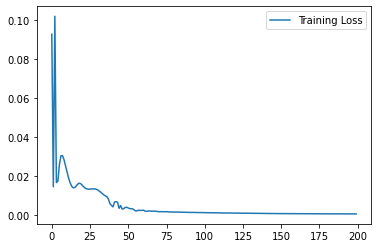

In [22]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [23]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 266.00 RMSE
Test Score: 601.95 RMSE


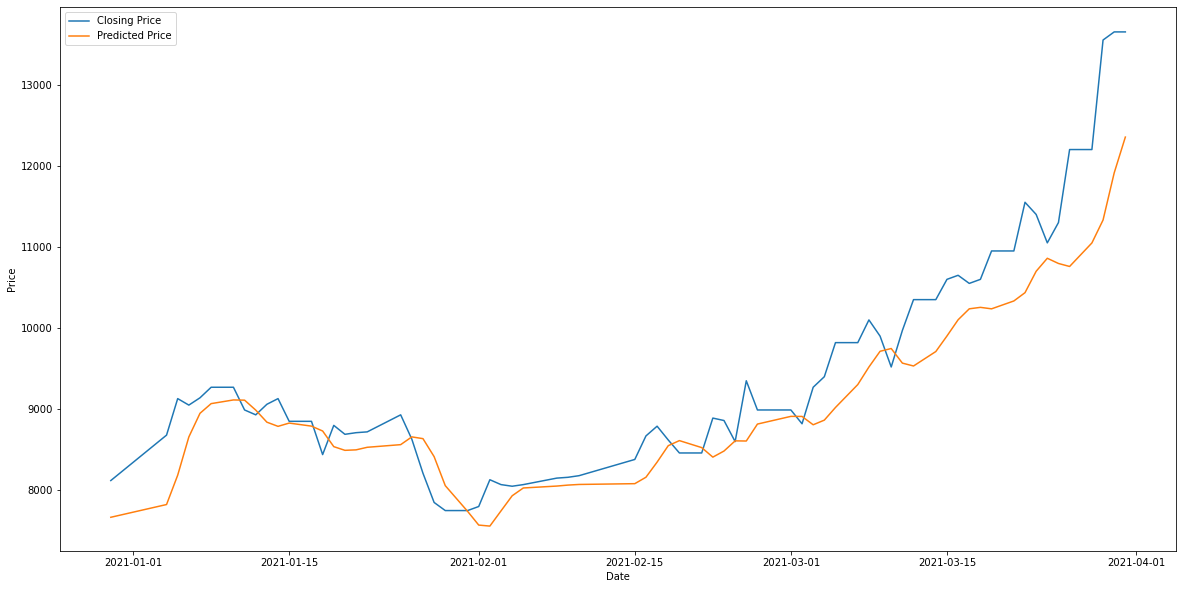

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions look very accurate. With the price of the stock increasing for most of 2021 lets see if we can make a profit on this stock using bollinger bands.

In [26]:
boll_daily = DSMC[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 20)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 20)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1246058983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1246058983.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1246058983.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,5850.000000,NaN,NaN,NaN
1,2020-01-03,5900.000000,NaN,NaN,NaN
2,2020-01-06,5730.000000,NaN,NaN,NaN
3,2020-01-07,5690.000000,NaN,NaN,NaN
4,2020-01-08,5430.000000,NaN,NaN,NaN
...,...,...,...,...,...
336,2021-03-26,10758.727539,9979.698096,11151.959258,8807.436934
337,2021-03-28,11048.667969,10088.894922,11230.315931,8947.473913
338,2021-03-29,11331.145508,10204.407764,11358.273938,9050.541589
339,2021-03-30,11912.428711,10334.876855,11639.816812,9029.936898


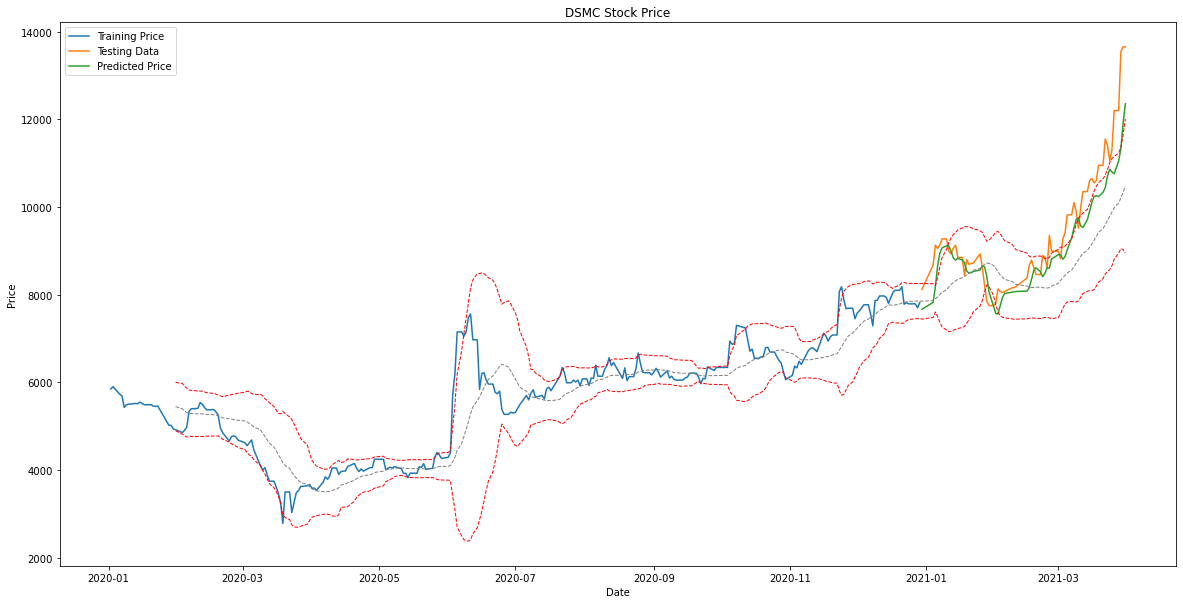

In [27]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DSMC Stock Price')
plt.legend()
plt.show()

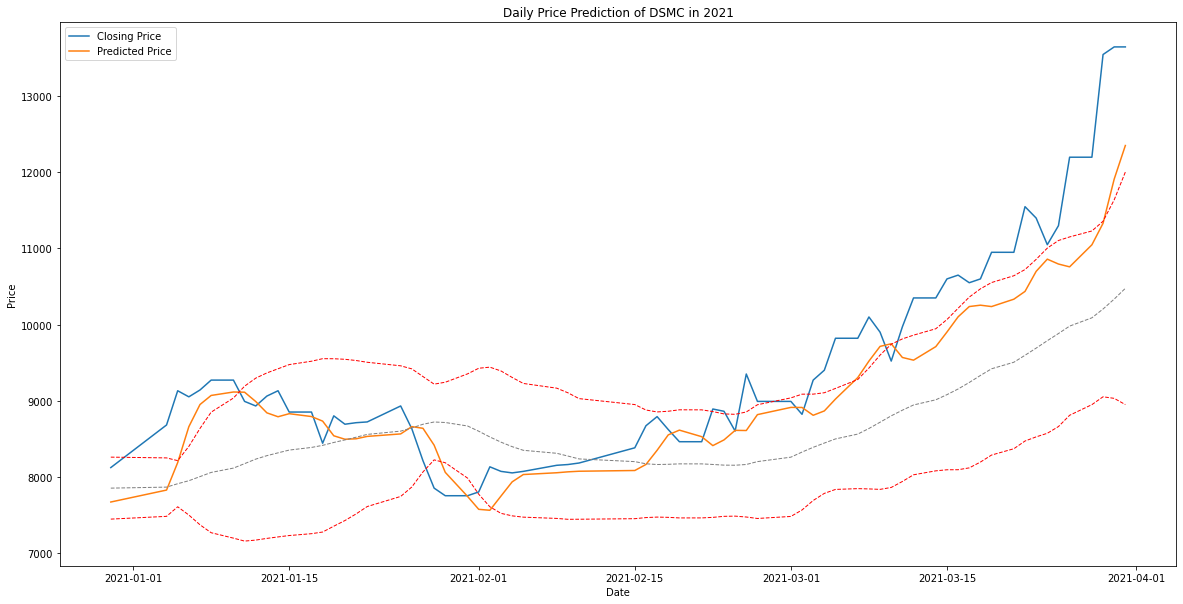

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][271:], boll_daily['upper_bb'][271:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][271:], boll_daily['lower_bb'][271:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][271:], boll_daily['SMA'][271:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of DSMC in 2021')
plt.legend()
plt.show()

The investment strategy with bollinger bands is to buy when price hits the lower band and sell when price hits the upper band. It looks like there are a couple of buy and sell indicators according to the bollinger bands. Let's see where these indicators are.

In [30]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/2526091140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
272,2021-01-04,7824.407227,7863.084399,8247.276588,7478.892211,8680.0
273,2021-01-05,8186.080078,7907.888403,8211.158227,7604.618579,9130.0
274,2021-01-06,8657.483398,7947.262573,8398.301235,7496.223911,9050.0
275,2021-01-07,8948.904297,8001.207788,8634.567305,7367.848271,9140.0
276,2021-01-08,9068.213867,8056.118481,8848.537786,7263.699177,9270.0
...,...,...,...,...,...,...
336,2021-03-26,10758.727539,9979.698096,11151.959258,8807.436934,12200.0
337,2021-03-28,11048.667969,10088.894922,11230.315931,8947.473913,12200.0
338,2021-03-29,11331.145508,10204.407764,11358.273938,9050.541589,13550.0
339,2021-03-30,11912.428711,10334.876855,11639.816812,9029.936898,13650.0


In [31]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
293,2021-01-29,8057.205078,8712.644287,9241.845062,8183.443512,7750.0
294,2021-01-31,7740.890137,8666.814624,9351.920867,7981.708381,7750.0
295,2021-02-01,7571.197266,8597.929272,9425.787532,7770.071013,7800.0
296,2021-02-02,7558.663086,8522.451733,9440.158095,7604.745372,8130.0


In [32]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
274,2021-01-06,8657.483398,7947.262573,8398.301235,7496.223911,9050.0
275,2021-01-07,8948.904297,8001.207788,8634.567305,7367.848271,9140.0
276,2021-01-08,9068.213867,8056.118481,8848.537786,7263.699177,9270.0
277,2021-01-10,9113.560547,8113.296509,9034.170290,7192.422728,9270.0
319,2021-03-07,9303.046875,8560.423169,9277.636945,7843.209393,9820.0
320,2021-03-08,9519.583984,8633.802856,9428.147731,7839.457982,10100.0
321,2021-03-09,9713.274414,8716.265527,9599.057579,7833.473475,9900.0
322,2021-03-10,9747.473633,8800.043677,9741.442408,7858.644946,9520.0
339,2021-03-30,11912.428711,10334.876855,11639.816812,9029.936898,13650.0
340,2021-03-31,12353.746094,10476.584961,12005.129585,8948.040337,13650.0


The buying indicator I'll use is at the lowest predicted price on 02-02-2021 at a closing price of \\$8130. There are a lot of selling indicators to choose from. The selling indicator I will use is when the bollinger band hits the highest predicted price on 03-31-2021 at a closing price of \\$13650. This results in a profit of 67.9%.

## Weekly

In [34]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [36]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 16)
X_test_w, y_test_w = get_weekly_test_data(DSMC, testing_data, scaler, 16)

In [37]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [38]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.10344948619604111
Epoch  1 MSE:  0.05910682678222656
Epoch  2 MSE:  0.02560913749039173
Epoch  3 MSE:  0.039081573486328125
Epoch  4 MSE:  0.014268852770328522
Epoch  5 MSE:  0.017664147540926933
Epoch  6 MSE:  0.0218855869024992
Epoch  7 MSE:  0.02131522074341774
Epoch  8 MSE:  0.018278062343597412
Epoch  9 MSE:  0.015383894555270672
Epoch  10 MSE:  0.014238093979656696
Epoch  11 MSE:  0.014902230352163315
Epoch  12 MSE:  0.015904322266578674
Epoch  13 MSE:  0.015830526128411293
Epoch  14 MSE:  0.014817025512456894
Epoch  15 MSE:  0.01384594663977623
Epoch  16 MSE:  0.013485277071595192
Epoch  17 MSE:  0.01363337691873312
Epoch  18 MSE:  0.013885174877941608
Epoch  19 MSE:  0.013882563449442387
Epoch  20 MSE:  0.013474027626216412
Epoch  21 MSE:  0.012730817310512066
Epoch  22 MSE:  0.011885401792824268
Epoch  23 MSE:  0.011221744120121002
Epoch  24 MSE:  0.010895183309912682
Epoch  25 MSE:  0.010634680278599262
Epoch  26 MSE:  0.009630517102777958
Epoch  27 MSE:  0.0

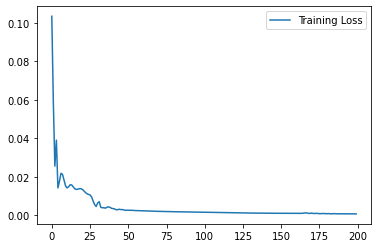

In [39]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [40]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(14, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5923.58 RMSE
Test Score: 9343.92 RMSE


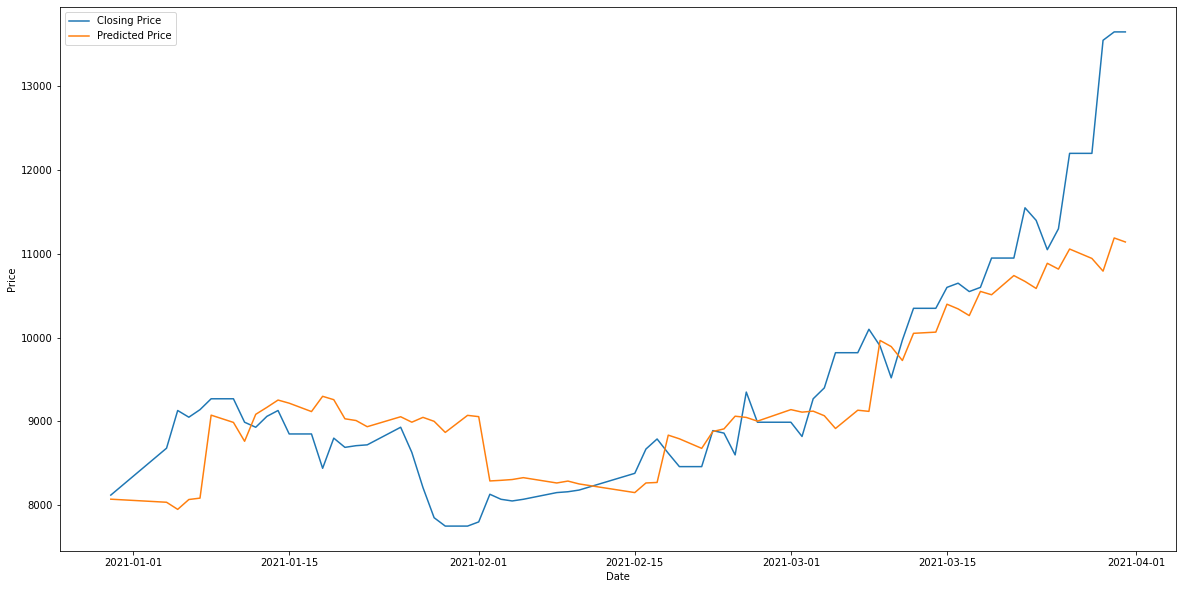

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly price predictions are pretty accurate but does not account for the sharp rise in price near the end of March.

In [50]:
boll_weekly = DSMC[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 20)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 20)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1659220125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1659220125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1659220125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,5850.000000,NaN,NaN,NaN
1,2020-01-03,5900.000000,NaN,NaN,NaN
2,2020-01-06,5730.000000,NaN,NaN,NaN
3,2020-01-07,5690.000000,NaN,NaN,NaN
4,2020-01-08,5430.000000,NaN,NaN,NaN
...,...,...,...,...,...
336,2021-03-26,11057.819336,10138.573682,11445.711624,8831.435739
337,2021-03-28,10945.519531,10232.476367,11484.290283,8980.662452
338,2021-03-29,10793.817383,10326.403369,11435.891227,9216.915511
339,2021-03-30,11190.031250,10429.239014,11450.896448,9407.581579


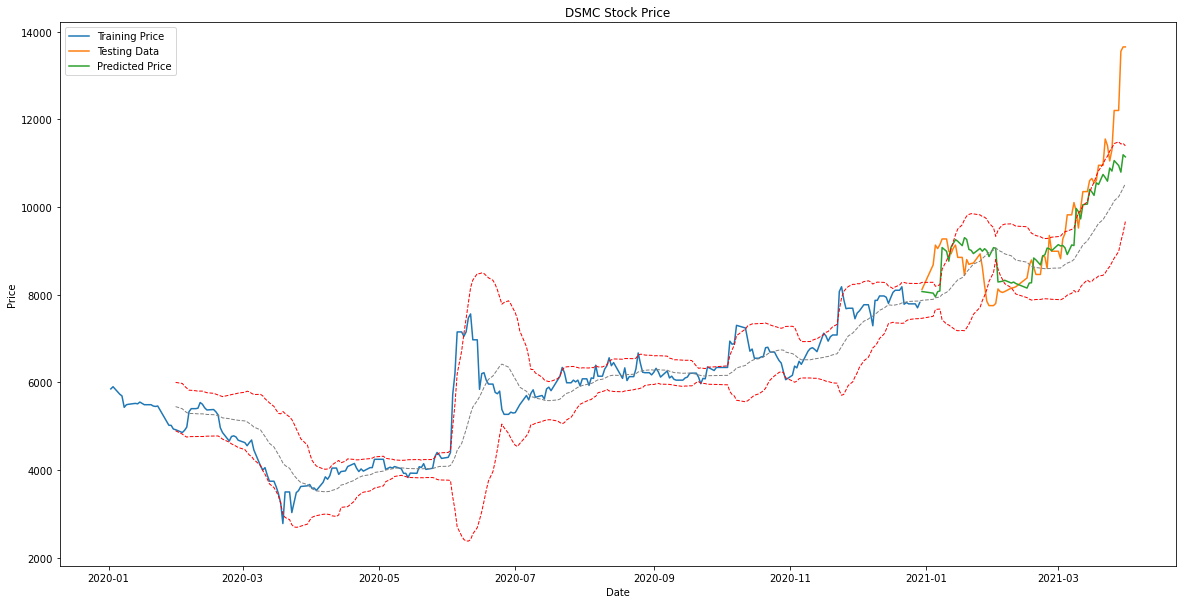

In [51]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DSMC Stock Price')
plt.legend()
plt.show()

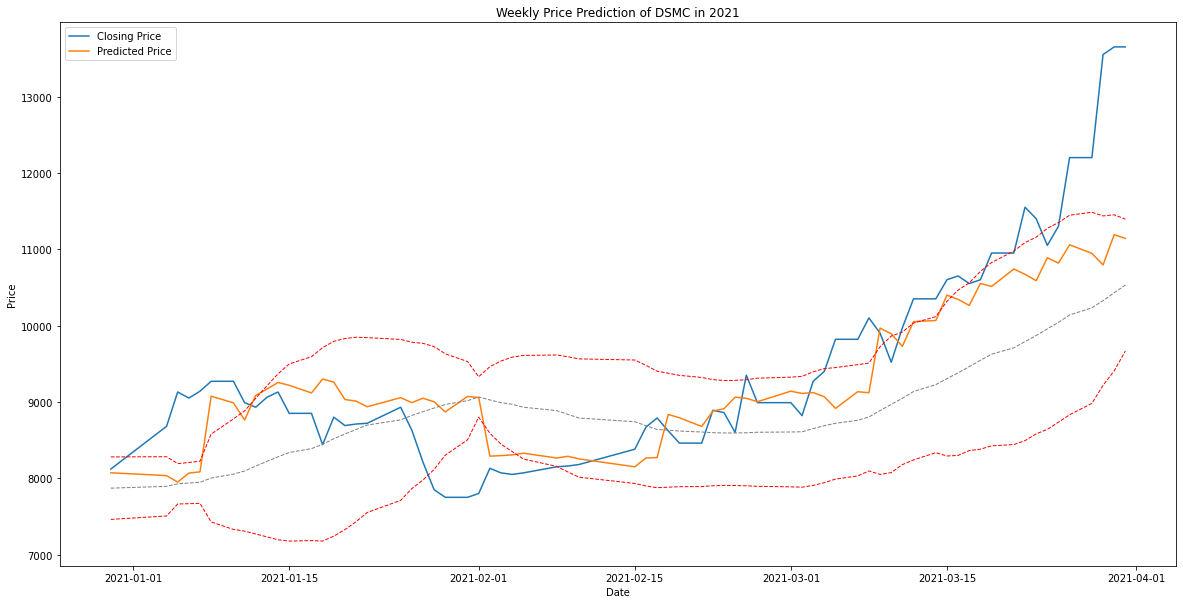

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][271:], boll_weekly['upper_bb'][271:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][271:], boll_weekly['lower_bb'][271:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][271:], boll_weekly['SMA'][271:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of DSMC in 2021')
plt.legend()
plt.show()

The buy and sell indicators look pretty similar to the daily indicators, however there is no sell indicator near the end of March which will limit potential profits.

In [53]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/1562068346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
272,2021-01-04,8034.593262,7893.792285,8281.816167,7505.768404,8680.0
273,2021-01-05,7949.631836,7926.773877,8191.137763,7662.409991,9130.0
274,2021-01-06,8067.265625,7936.637158,8206.739761,7666.534555,9050.0
275,2021-01-07,8083.881836,7947.331250,8223.199807,7671.462693,9140.0
276,2021-01-08,9074.487305,8002.555615,8577.554696,7427.556535,9270.0
...,...,...,...,...,...,...
336,2021-03-26,11057.819336,10138.573682,11445.711624,8831.435739,12200.0
337,2021-03-28,10945.519531,10232.476367,11484.290283,8980.662452,12200.0
338,2021-03-29,10793.817383,10326.403369,11435.891227,9216.915511,13550.0
339,2021-03-30,11190.031250,10429.239014,11450.896448,9407.581579,13650.0


In [54]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
296,2021-02-02,8289.039062,9025.471436,9461.521829,8589.421042,8130.0
297,2021-02-03,8296.313477,8990.897363,9535.634716,8446.160010,8070.0
298,2021-02-04,8305.860352,8968.057178,9586.418511,8349.695844,8050.0


In [55]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
276,2021-01-08,9074.487305,8002.555615,8577.554696,7427.556535,9270.0
277,2021-01-10,8987.794922,8053.445361,8777.222737,7329.667986,9270.0
279,2021-01-12,9084.439453,8158.800537,9047.933331,7269.667743,8930.0
321,2021-03-09,9966.369141,8886.120190,9722.119191,8050.121190,9900.0
322,2021-03-10,9893.125000,8968.107935,9862.416758,8073.799111,9520.0
324,2021-03-12,10051.413086,9136.279883,10032.914455,8239.645311,10350.0
326,2021-03-15,10399.061523,9304.187842,10317.183948,8291.191736,10600.0


The buying indicator I will use is with the lowest predicted price on 02-02-2021 at a closing price of \\$8130. The selling indicator I will use is with the highest predicted price on 03-15-2021 at a closing price of \\$10600. This results in a 30.4% profit.

# Monthly

In [67]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


I'll be creating a new test dataset for the monthly model because the test dataset needs to be divisible by 20 for the test dataset to be uniform in shape.

In [58]:
## create a new test set for monthly model

testing_data_m = DSMC[['Date', 'Price']][281:]
len(testing_data_m)

60

In [68]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 31)
X_test_m, y_test_m = get_monthly_test_data(DSMC, testing_data_m, scaler, 31)

In [69]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [70]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1007435992360115
Epoch  1 MSE:  0.0667596384882927
Epoch  2 MSE:  0.029549896717071533
Epoch  3 MSE:  0.10325312614440918
Epoch  4 MSE:  0.018855992704629898
Epoch  5 MSE:  0.02272557094693184
Epoch  6 MSE:  0.030149495229125023
Epoch  7 MSE:  0.03126084804534912
Epoch  8 MSE:  0.029097093269228935
Epoch  9 MSE:  0.025908080860972404
Epoch  10 MSE:  0.022967947646975517
Epoch  11 MSE:  0.020946642383933067
Epoch  12 MSE:  0.01996356062591076
Epoch  13 MSE:  0.01949104107916355
Epoch  14 MSE:  0.018784301355481148
Epoch  15 MSE:  0.017691440880298615
Epoch  16 MSE:  0.016641508787870407
Epoch  17 MSE:  0.016014156863093376
Epoch  18 MSE:  0.01584121771156788
Epoch  19 MSE:  0.015922388061881065
Epoch  20 MSE:  0.016028763726353645
Epoch  21 MSE:  0.016018465161323547
Epoch  22 MSE:  0.015856685116887093
Epoch  23 MSE:  0.015586506575345993
Epoch  24 MSE:  0.015285328030586243
Epoch  25 MSE:  0.015024182386696339
Epoch  26 MSE:  0.014838488772511482
Epoch  27 MSE:  0.014

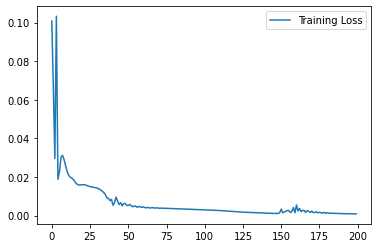

In [71]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [72]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5944.01 RMSE
Test Score: 8081.44 RMSE


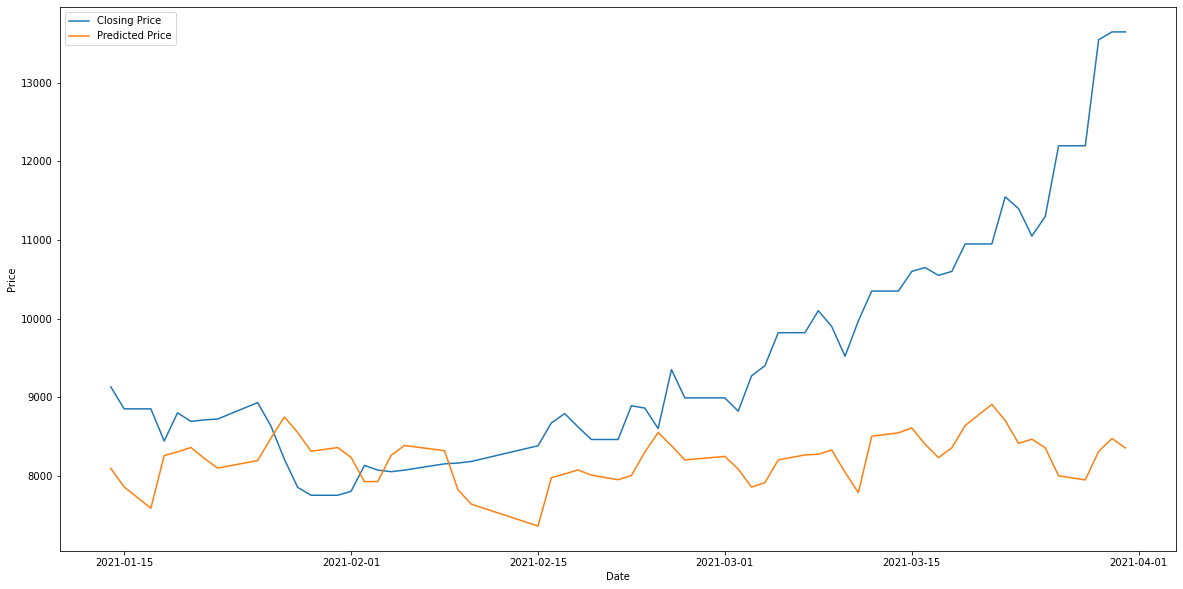

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data_m['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data_m['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly price predictions are very inaccurate being unable to predict the increase in the price of the stock towards the end of the first quarter.

In [80]:
boll_monthly = DSMC[['Date']]
boll_monthly.drop(index=[271, 272, 273, 274, 275, 276, 277, 278, 279, 280], inplace=True)

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/424636854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/424636854.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,5850.000000,NaN,NaN,NaN
1,2020-01-03,5900.000000,NaN,NaN,NaN
2,2020-01-06,5730.000000,NaN,NaN,NaN
3,2020-01-07,5690.000000,NaN,NaN,NaN
4,2020-01-08,5430.000000,NaN,NaN,NaN
...,...,...,...,...,...
336,2021-03-26,7996.983398,8345.207568,8896.978696,7793.436441
337,2021-03-28,7945.318359,8346.919873,8893.203647,7800.636099
338,2021-03-29,8308.524414,8352.346094,8894.626504,7810.065684
339,2021-03-30,8472.828125,8362.813721,8905.952694,7819.674748


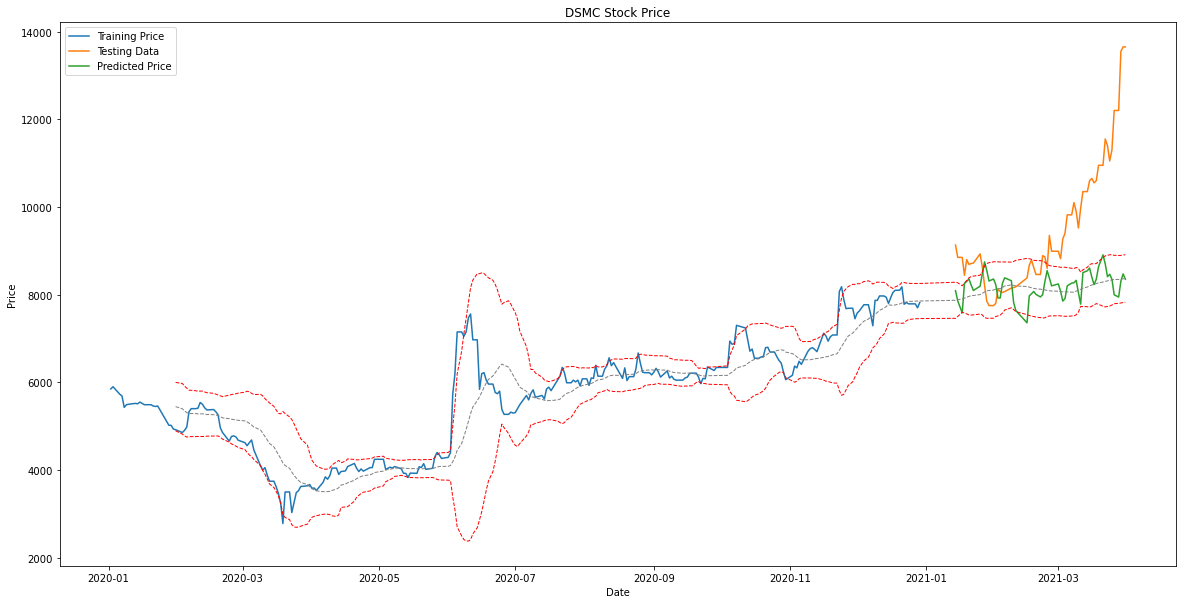

In [81]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data_m['Date'], testing_data_m['Price'], label='Testing Data')
plt.plot(testing_data_m['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DSMC Stock Price')
plt.legend()
plt.show()

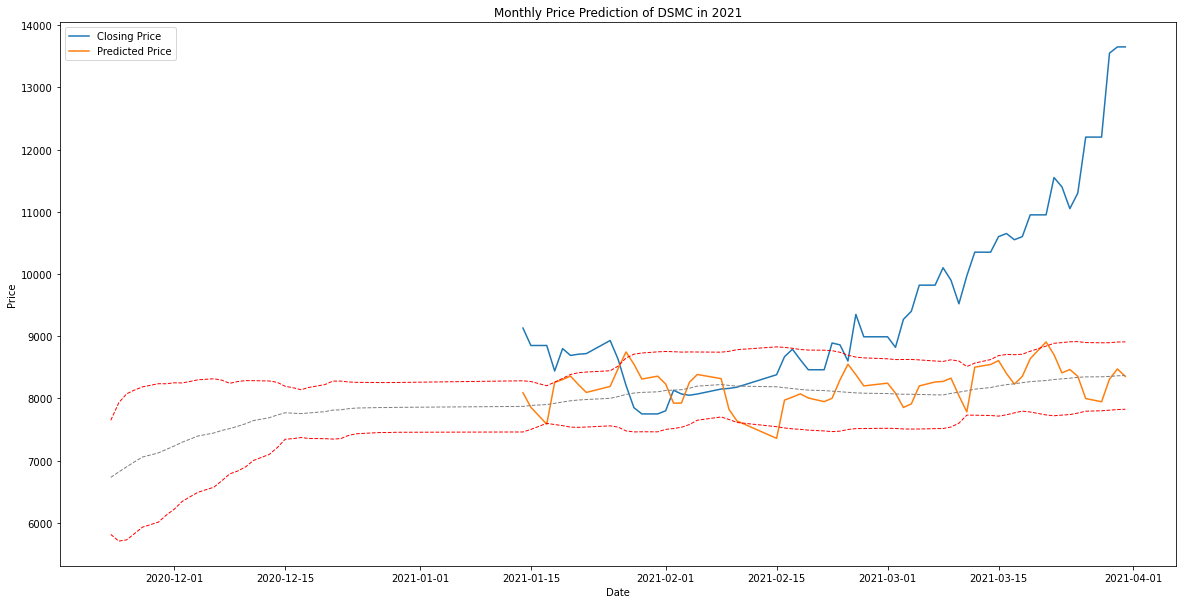

In [82]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data_m['Date'], testing_data_m['Price'], label='Closing Price')
plt.plot(testing_data_m['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of DSMC in 2021')
plt.legend()
plt.show()

Even though the price prediction are inaccurate, there are multiple buy and sell indicators that I can use here. Let's see if using these indicators turns a profit.

In [86]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-01']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_9816/3844387549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
281,2021-01-14,8091.317871,7871.065894,8282.471412,7459.660375,9130.0
282,2021-01-15,7856.082520,7885.870020,8270.588138,7501.151901,8850.0
283,2021-01-17,7585.054688,7900.622754,8202.934571,7598.310936,8850.0
284,2021-01-18,8255.834961,7919.914502,8260.782927,7579.046077,8440.0
285,2021-01-19,8301.923828,7941.510693,8321.544031,7561.477356,8800.0
286,2021-01-20,8358.009766,7960.911182,8384.219607,7537.602756,8690.0
287,2021-01-21,8220.485352,7973.435449,8412.408319,7534.462579,8710.0
288,2021-01-22,8095.391113,7981.205005,8423.176555,7539.233455,8720.0
289,2021-01-25,8191.948730,8000.802441,8443.701032,7557.903851,8930.0
290,2021-01-26,8478.215820,8028.213232,8518.033723,7538.392742,8630.0


In [87]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
283,2021-01-17,7585.054688,7900.622754,8202.934571,7598.310936,8850.0
303,2021-02-15,7357.223145,8186.004395,8827.607378,7544.401412,8380.0


In [88]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
291,2021-01-27,8746.181641,8063.022314,8648.892798,7477.151831,8210.0
331,2021-03-21,8907.036133,8287.025732,8840.460897,7733.590567,10950.0


Theres a couple sell indicators before our first buy indicator so we'll ignore those. The first buy indicator I'll use is the one when the predicted price is lowest on 02-15-2021 with a closing price of \\$8380. The sell indicator I'll use is when the predicted price is highest on 03-21-2021 with a closing price of \\$10950. This results in a profit of 33.4%

Even with inaccurate price predictions we were able to turn a profit using the monthly data.

# Conclusion

Using price predictions with an LSTM model on DSMC, I was able to consistently make a profit using bollinger bands on the price predictions. The best performance was on the daily price predictions with a 67.9% profit. The weekly and monthly price predictions performed similary with weekly predictions profiting 30.4% and monthly predictions profiting 33.4%.

I would recommend an investment strategy using the indicators given with the daily price predictions. Using this investment strategy leads to a profit of 67.9%.